In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
df = pd.read_csv(r'E:\Mumbai Flat Real Estate Intelligence\datasets\mumbai_properties_cleaned_v2.csv').drop_duplicates()

In [39]:
df['major_location'] = df['major_location'].replace('Other', 'others')

In [40]:
df['major_location'].value_counts().shape

(115,)

In [41]:
df.sample()

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
7896,4.8,3,2,0,Moderately Old,Andheri West,1175.0,Furnished


In [42]:
df.shape

(9660, 8)

In [43]:

df.columns

Index(['price', 'bedrooms', 'bathrooms', 'balcony', 'property_age',
       'major_location', 'built_up_area', 'furnishing_type'],
      dtype='object')

C:\Users\vikas\AppData\Local\Temp\ipykernel_9600\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

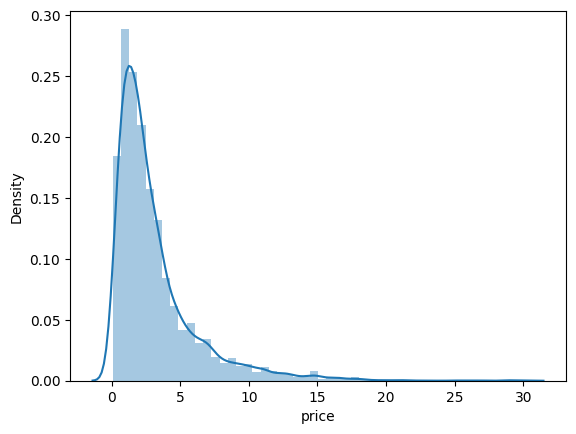

In [44]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

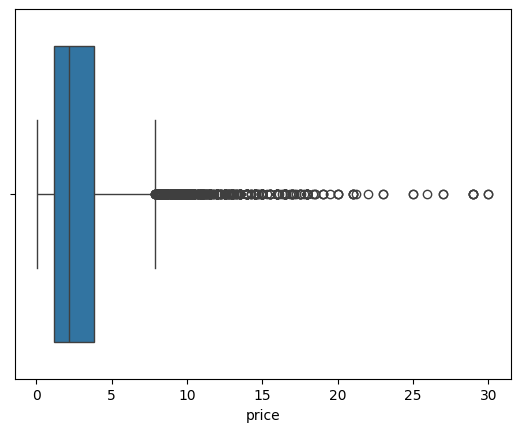

In [45]:
sns.boxplot(x=df['price'])

In [46]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(726,
 count    726.000000
 mean      11.541143
 std        3.553959
 min        7.900000
 25%        9.000000
 50%       10.500000
 75%       13.000000
 max       30.000000
 Name: price, dtype: float64)

In [47]:
outliers.sort_values('price',ascending=False).head(20)

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
9665,30.00,7,9,2,Relatively New,Lower Parel,5158.0,Unfurnished
9664,30.00,4,4,2,Relatively New,Malabar Hill,2917.0,Unfurnished
9662,29.00,6,4,3,Moderately Old,Lower Parel,5042.0,Furnished
9661,29.00,5,6,1,Old Property,Malabar Hill,2850.0,Furnished
9663,29.00,7,7,0,Relatively New,Lower Parel,5158.0,Furnished
9660,29.00,5,5,0,Moderately Old,Malabar Hill,3181.0,Furnished
9658,27.00,4,5,2,Undefined,Malabar Hill,3565.0,Unfurnished
9659,27.00,5,5,0,Undefined,Malabar Hill,3699.0,Unfurnished
9657,25.95,6,6,2,Old Property,Malabar Hill,5210.0,Furnished
9655,25.00,3,3,0,Relatively New,Malabar Hill,2881.0,Unfurnished


#### on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Bedroom

C:\Users\vikas\AppData\Local\Temp\ipykernel_9600\1914422719.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedrooms'])


<Axes: xlabel='bedrooms', ylabel='Density'>

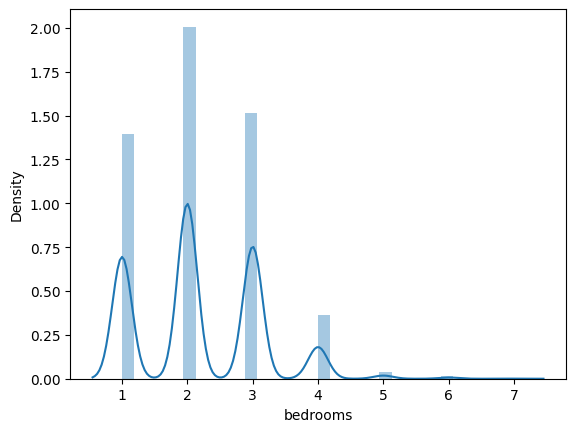

In [48]:
sns.distplot(df['bedrooms'])


<Axes: xlabel='bedrooms'>

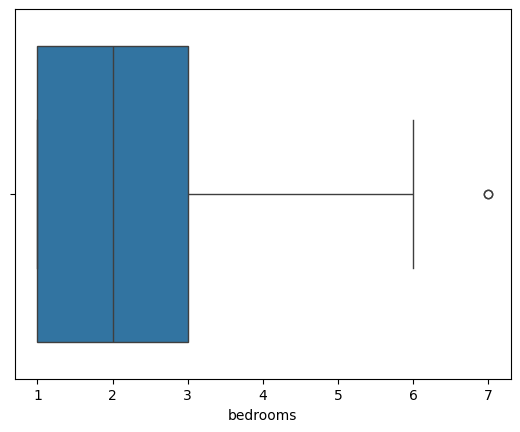

In [49]:
sns.boxplot(x=df['bedrooms'])

In [50]:
df['bedrooms'].describe()

count    9660.000000
mean        2.189959
std         0.943284
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: bedrooms, dtype: float64

In [51]:
df=df[df['bedrooms'] < 7]

In [52]:
df.drop(5573, inplace=True)


In [53]:
df[df['bedrooms']>6]

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type


### Bathroom

C:\Users\vikas\AppData\Local\Temp\ipykernel_9600\408312771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathrooms'])


<Axes: xlabel='bathrooms', ylabel='Density'>

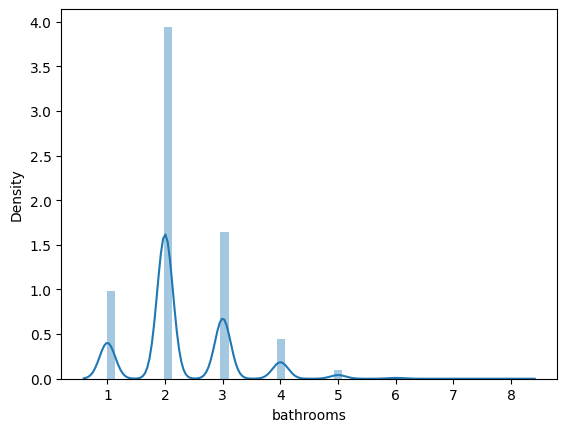

In [54]:
sns.distplot(df['bathrooms'])

<Axes: xlabel='bathrooms'>

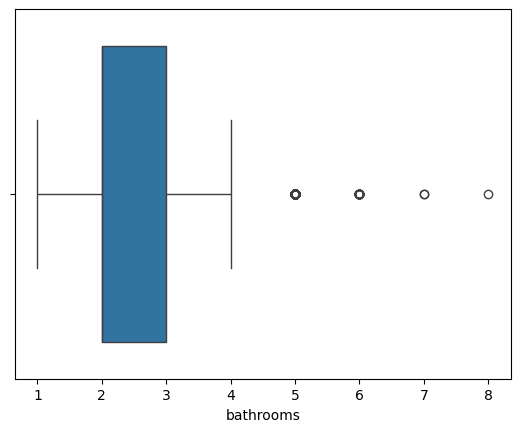

In [55]:
sns.boxplot(x=df['bathrooms'])

In [56]:
df[df['bathrooms'] > 7].sort_values('bathrooms',ascending=False)

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
9652,22.0,5,8,2,Relatively New,Lower Parel,4500.0,Furnished


### super built up area

### built up area


C:\Users\vikas\AppData\Local\Temp\ipykernel_9600\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

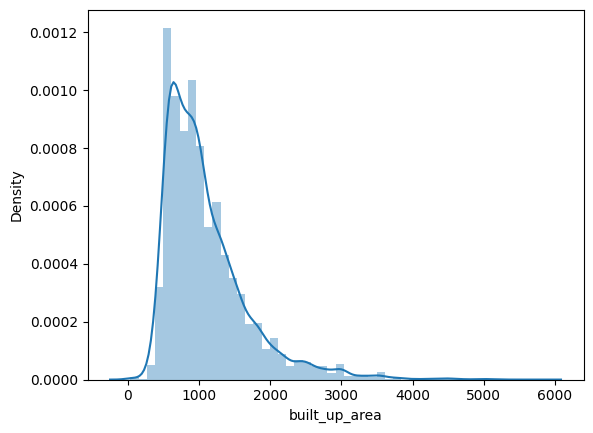

In [57]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

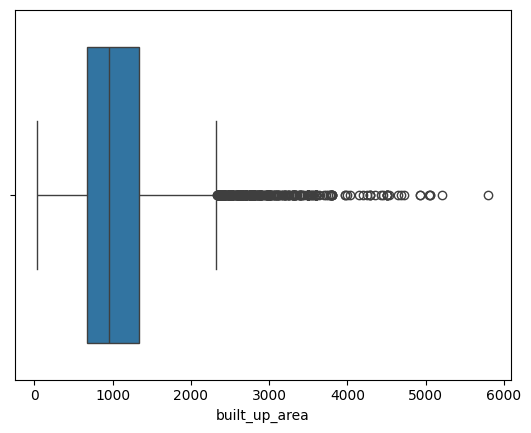

In [58]:
sns.boxplot(x=df['built_up_area'])

In [59]:
df[df['built_up_area'] > 5000]

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
9639,18.50,4,5,3+,Relatively New,Bandra West,5056.0,Unfurnished
9642,19.00,4,5,3+,Relatively New,Bandra West,5800.0,Unfurnished
9645,20.00,4,5,3+,Relatively New,Bandra West,5056.0,Unfurnished
9657,25.95,6,6,2,Old Property,Malabar Hill,5210.0,Furnished
9662,29.00,6,4,3,Moderately Old,Lower Parel,5042.0,Furnished


In [60]:
df.drop([1982, 3143, 5113, 5572], inplace=True)
df.reset_index(drop=True, inplace=True)


### carpet area


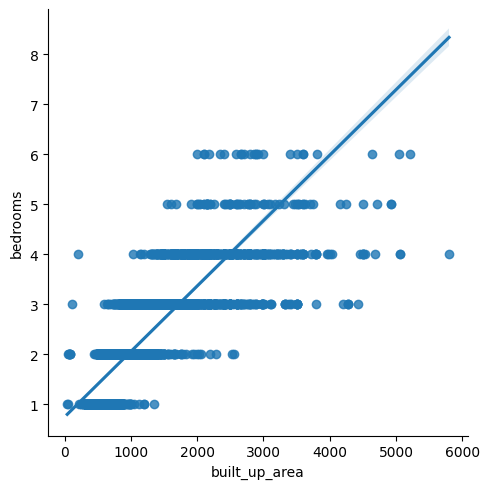

In [61]:
sns.lmplot(data=df, x='built_up_area', y='bedrooms')

In [62]:
df['major_location'].value_counts().shape

(115,)

In [63]:
df[(df['built_up_area'] < 500) & (df['bedrooms']>2)]

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
696,0.5,4,2,1,Old Property,Bandra East,200.0,Unfurnished
6230,3.0,3,2,2,Old Property,Powai,108.0,Unfurnished


In [64]:
df.drop([696,6242], inplace=True)
df.reset_index(drop=True, inplace=True)


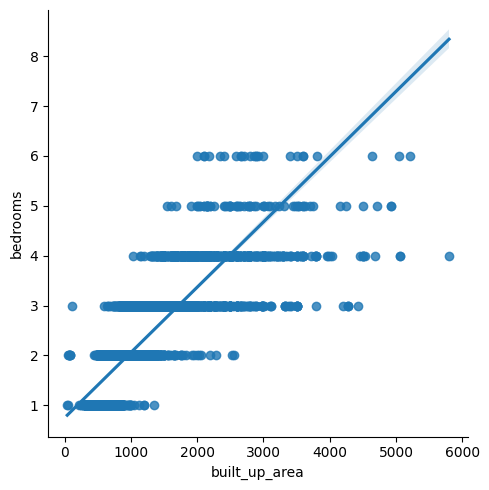

In [65]:
sns.lmplot(data=df, x='built_up_area', y='bedrooms')

In [66]:
df[(df['built_up_area'] > 5000) & (df['bedrooms']>3)]

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
9625,18.50,4,5,3+,Relatively New,Bandra West,5056.0,Unfurnished
9628,19.00,4,5,3+,Relatively New,Bandra West,5800.0,Unfurnished
9631,20.00,4,5,3+,Relatively New,Bandra West,5056.0,Unfurnished
9643,25.95,6,6,2,Old Property,Malabar Hill,5210.0,Furnished
9648,29.00,6,4,3,Moderately Old,Lower Parel,5042.0,Furnished


In [67]:
df.drop([9633,9636], inplace=True)
df.reset_index(drop=True, inplace=True)


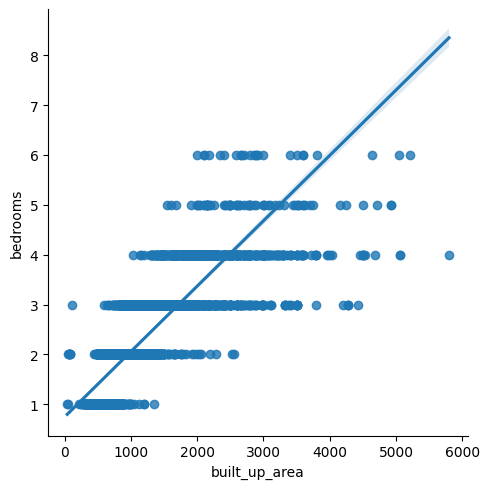

In [68]:
sns.lmplot(data=df, x='built_up_area', y='bedrooms')

In [69]:
df[df.duplicated()]

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type


In [73]:
df['major_location'].unique()

array(['Palghar', 'Nalasopara West', 'others', 'Naigaon East',
       'Virar East', 'Virar West', 'Vasai East', 'Boisar',
       'Nalasopara East', 'Vasai West', 'Virar west', 'Chikhal Dongari',
       'Wadala', 'Goregaon East', 'Bolinj', 'Thane West',
       'Mira Road East', 'Parel', 'Dahisar East', 'Kandivali West',
       'Malad West', 'Mira Road', 'Chembur', 'Ghatkopar East',
       'Kandivali East', 'Kurla West', 'Bhayandar East', 'Byculla',
       'Lower Parel', 'Bhandup West', 'Shanti Park', 'Bhayandar West',
       'Govandi', 'Kashimira', 'Mulund West', 'Jogeshwari East',
       'Santacruz East', 'Vikhroli East', 'Ramdev Park',
       'Kanjurmarg East', 'Dahisar West', 'Bandra East', 'Dadar East',
       'Vikhroli West', 'Jogeshwari West', 'Kurla East', 'Ghatkopar West',
       'Andheri West', 'Goregaon West', 'Borivali West', 'Malad East',
       'Borivali East', 'Mulund East', 'Powai', 'Bhandup East', 'Colaba',
       'Vile Parle East', 'Andheri East', 'Dahisar', 'Kherwadi',

In [70]:
df.to_csv('mumbai_prperties_outlier_treated.csv',index=False)